In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#import commuter csvs
county_commute_data = pd.read_csv("..\Resources\county_commute_data.csv")
other_state_commute_data = pd.read_csv("..\Resources\other_state_commute_data.csv")

## MO Tables & Graphs

### MO Commute Overview

In [2]:
#calculate total population, total commuters, and commuter %
MO_total_pop = county_commute_data["Total Population"].sum()
MO_total_commuters = county_commute_data["Total Commuters"].sum()
MO_commuter_perc = MO_total_commuters / MO_total_pop * 100

#create MO commute overview table
MO_pop_overview = pd.DataFrame([{"State": "Missouri", "Total Population": MO_total_pop, 
                                 "Total Commuters": MO_total_commuters, "Commuter %": MO_commuter_perc}])
#table formatting
MO_pop_overview = MO_pop_overview.set_index("State")
MO_pop_overview = MO_pop_overview[["Total Population", "Total Commuters", "Commuter %"]]

MO_pop_overview

,Total Population,Total Commuters,Commuter %
State,,,
Missouri,6059651.0,2803637.0,46.267302


### MO & non-MO Metro Areas Commute Overview

In [5]:
#append non-MO county data to MO county data
all_commute_data = county_commute_data.append(other_state_commute_data)

#calculate total population, total commuters, and commuter %
all_total_pop = all_commute_data["Total Population"].sum()
all_total_commuters = all_commute_data["Total Commuters"].sum()
all_commuter_perc = all_total_commuters / all_total_pop * 100

#create MO commute overview table with non-MO metro areas added
all_pop_overview = pd.DataFrame([{"State": "Missouri & non-MO Metro Counties", "Total Population": all_total_pop, 
                                 "Total Commuters": all_total_commuters, "Commuter %": all_commuter_perc}])
#table formatting
all_pop_overview = all_pop_overview.set_index("State")
all_pop_overview = all_pop_overview[["Total Population", "Total Commuters", "Commuter %"]]

all_pop_overview

,Total Population,Total Commuters,Commuter %
State,,,
Missouri & non-MO Metro Counties,7541282.0,3517205.0,46.639351


### MO Commute Type Breakdown

In [7]:
#calculate totals for commute types
MO_solo = county_commute_data["Solo Commuters"].sum()
MO_carpool = county_commute_data["Carpoolers"].sum()
MO_public = county_commute_data["Public Transit"].sum()
MO_walk = county_commute_data["Walking"].sum()
MO_other = county_commute_data["Other Transit"].sum()

#calculate %s for each commute type
MO_solo_perc = MO_solo / MO_pop_overview["Total Commuters"]["Missouri"] * 100
MO_carpool_perc = MO_carpool / MO_pop_overview["Total Commuters"]["Missouri"] * 100
MO_public_perc = MO_public / MO_pop_overview["Total Commuters"]["Missouri"] * 100
MO_walk_perc = MO_walk / MO_pop_overview["Total Commuters"]["Missouri"] * 100
MO_other_perc = MO_other / MO_pop_overview["Total Commuters"]["Missouri"] * 100

#create MO commute types table
MO_commute_df = pd.DataFrame([{"State": "Missouri", "Solo Commuters": MO_solo, "Solo Commuter %": MO_solo_perc, 
                               "Carpoolers": MO_carpool, "Carpooler %": MO_carpool_perc, 
                               "Public Transit": MO_public, "Public Transit %": MO_public_perc, 
                               "Walking": MO_walk, "Walking %": MO_walk_perc, 
                               "Other Transit": MO_other, "Other Transit %": MO_other_perc}])

#table formatting
MO_commute_df = MO_commute_df.set_index("State")
MO_commute_df = MO_commute_df[["Solo Commuters", "Solo Commuter %", "Carpoolers", "Carpooler %", 
                               "Public Transit", "Public Transit %", "Walking", "Walking %", 
                               "Other Transit", "Other Transit %"]]
MO_commute_df

,Solo Commuters,Solo Commuter %,Carpoolers,Carpooler %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
State,,,,,,,,,,
Missouri,2288917.0,81.64099,255260.0,9.104602,41741.0,1.488816,53557.0,1.910269,35930.0,1.28155


### MO Commute Type Pie Graph

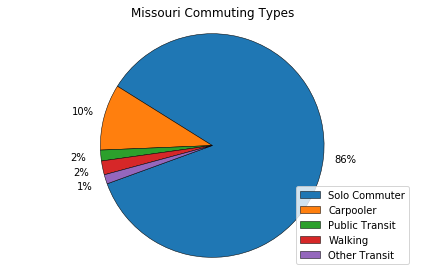

In [9]:
#create MO commute type graph
MO_commute_plot = plt.figure()
MO_commutes = plt.subplot()

#set list of commute types with %
commute_type_percs = ["Solo Commuter %", "Carpooler %", "Public Transit %", "Walking %", "Other Transit %"]

#set empty list for commute type %s
MO_commute_type_percs = []

#fill commute type %s list
for commute_type in commute_type_percs:
    MO_commute_type_percs.append(MO_commute_df[commute_type])
    
#plot commute type %s
MO_commutes.pie(MO_commute_type_percs, startangle = 200, autopct='%1.0f%%', pctdistance=1.2, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
#formatting
plt.legend(labels = ["Solo Commuter", "Carpooler", "Public Transit", "Walking", "Other Transit"], loc="lower right")
plt.axis("equal")
plt.title("Missouri Commuting Types")
plt.tight_layout()

#export figure
MO_commute_plot.savefig("..\Output\MO Commuting Types Legend.png", bbox_inches="tight")

### MO & non-MO Metro Areas Commute Type Breakdown

In [10]:
#calculate totals for commute types
all_solo = all_commute_data["Solo Commuters"].sum()
all_carpool = all_commute_data["Carpoolers"].sum()
all_public = all_commute_data["Public Transit"].sum()
all_walk = all_commute_data["Walking"].sum()
all_other = all_commute_data["Other Transit"].sum()

#calculate %s for each commute type
all_solo_perc = all_solo / all_pop_overview["Total Commuters"]["Missouri & non-MO Metro Counties"] * 100
all_carpool_perc = all_carpool / all_pop_overview["Total Commuters"]["Missouri & non-MO Metro Counties"] * 100
all_public_perc = all_public / all_pop_overview["Total Commuters"]["Missouri & non-MO Metro Counties"] * 100
all_walk_perc = all_walk / all_pop_overview["Total Commuters"]["Missouri & non-MO Metro Counties"] * 100
all_other_perc = all_other / all_pop_overview["Total Commuters"]["Missouri & non-MO Metro Counties"] * 100

#create MO & non-MO metro counties commute types table
all_commute_df = pd.DataFrame([{"State": "Missouri & non-MO Metro Counties", 
                               "Solo Commuters": all_solo, "Solo Commuter %": all_solo_perc, 
                               "Carpoolers": all_carpool, "Carpooler %": all_carpool_perc, 
                               "Public Transit": all_public, "Public Transit %": all_public_perc, 
                               "Walking": all_walk, "Walking %": all_walk_perc, 
                               "Other Transit": all_other, "Other Transit %": all_other_perc}])

#table formatting
all_commute_df = all_commute_df.set_index("State")
all_commute_df = all_commute_df[["Solo Commuters", "Solo Commuter %", "Carpoolers", "Carpooler %", 
                               "Public Transit", "Public Transit %", "Walking", "Walking %", 
                               "Other Transit", "Other Transit %"]]
all_commute_df

,Solo Commuters,Solo Commuter %,Carpoolers,Carpooler %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
State,,,,,,,,,,
Missouri & non-MO Metro Counties,2888167.0,82.115401,312705.0,8.890724,51236.0,1.456725,62256.0,1.770042,43108.0,1.225632


### MO & non-MO Metro Areas Commute Type Pie Graph

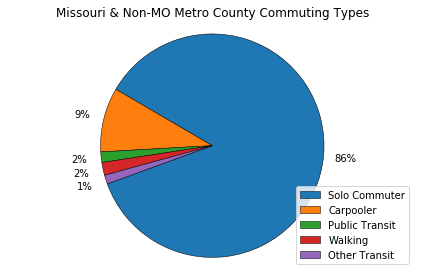

In [17]:
#create MO commute type graph
all_commute_plot = plt.figure()
all_commutes = plt.subplot()

#set empty list for commute type %s
all_commute_type_percs = []

#fill commute type %s list
for commute_type in commute_type_percs:
    all_commute_type_percs.append(all_commute_df[commute_type])

#plot commute type %s
all_commutes.pie(all_commute_type_percs, startangle = 200, autopct='%1.0f%%', pctdistance=1.2, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
#formatting
plt.legend(labels = ["Solo Commuter", "Carpooler", "Public Transit", "Walking", "Other Transit"], loc="lower right")
plt.axis("equal")
plt.title("Missouri & Non-MO Metro County Commuting Types")
plt.tight_layout()

#export figure
all_commute_plot.savefig("..\Output\MO & Non-MO Metro Areas Commuting Types Legend.png", bbox_inches="tight")

### Commute Type Comparison with & without non-MO Metro Counties

In [13]:
comparison = MO_commute_df.append(all_commute_df)
comparison

,Solo Commuters,Solo Commuter %,Carpoolers,Carpooler %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
State,,,,,,,,,,
Missouri,2288917.0,81.640990,255260.0,9.104602,41741.0,1.488816,53557.0,1.910269,35930.0,1.281550
Missouri & non-MO Metro Counties,2888167.0,82.115401,312705.0,8.890724,51236.0,1.456725,62256.0,1.770042,43108.0,1.225632


## ANOVA Statistical Analysis

In [14]:
anova_MO = stats.f_oneway(county_commute_data.iloc[:, 3:15], all_commute_data.iloc[:, 3:15])
anova_MO


F_onewayResult(statistic=array([0.2159623 , 0.28868294, 0.2174245 , 0.26402845, 0.22826648,
       0.27721739, 0.23138504, 0.1051747 , 0.03678893, 0.15710562,
       0.05318055, 0.09142478]), pvalue=array([0.64255868, 0.59156774, 0.64143586, 0.60784269, 0.6332507 ,
       0.5990212 , 0.63094065, 0.74599085, 0.84805896, 0.69219054,
       0.81781661, 0.76263767]))

### No significant differences in any category between all counties and only Missouri Counties